# 기본 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리

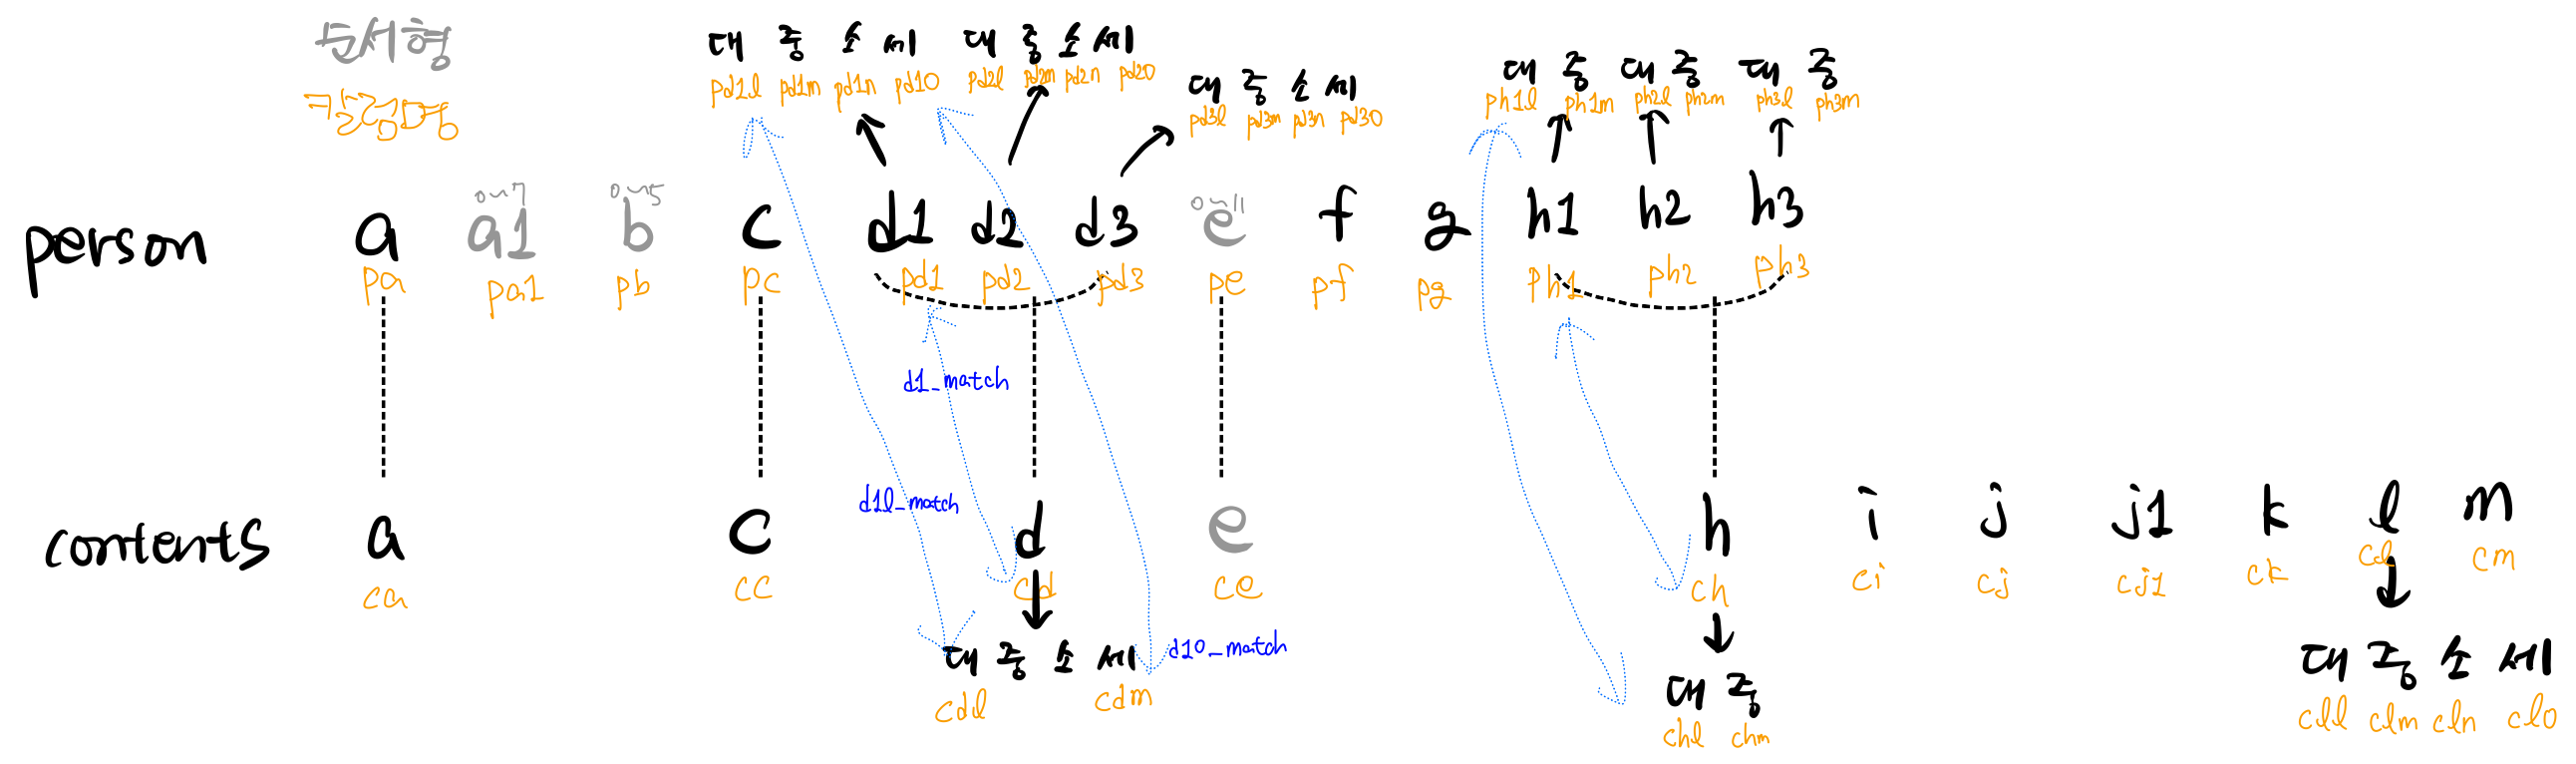

original data columns : Index(['id', 'dlmatch', 'dmmatch', 'dsmatch', 'hlmatch', 'hmmatch', 'hsmatch',
       'pa', 'pa1', 'pb', 'pc', 'pd1', 'pd2', 'pd3', 'pe', 'pf', 'pg', 'ph1',
       'ph2', 'ph3', 'ci', 'ca', 'cj1', 'cj', 'cc', 'ck', 'cl', 'cd', 'cm',
       'ce', 'ch', 'person_rn', 'contents_rn', 'contents_open_dt', 'target'],
      dtype='object')
pa           int64
pa1          int64
pb           int64
pc           int64
pd1          int64
             ...  
h2l_match    int64
h2m_match    int64
h3_match     int64
h3l_match    int64
h3m_match    int64
Length: 83, dtype: object


,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,target,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,...,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,216,274,274,275,216,297,368,369,216,297,368,369,...,58,368,216,274,274,275,94,422,2016,1605,1606,1607,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,8
1,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,1,56,109,114,1,56,152,175,1,56,152,175,...,94,399,216,274,274,275,94,417,2016,1605,1606,1607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,6
2,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,377,450,463,464,1,56,152,175,377,450,451,452,...,48,366,1,56,91,92,48,363,2016,1572,1595,1599,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4
3,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,618,690,703,703,618,690,703,703,618,690,703,703,...,1,315,216,274,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2
4,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,216,274,274,275,216,297,368,369,216,297,368,369,...,208,480,216,274,274,275,71,381,2016,1605,1606,1607,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,9
5,1,1,2,5,175,181,114,4,1,1,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,836994,580234,2020-06-29 20:46:41,1,1,56,152,175,1,56,152,175,1,56,109,114,...,1,315,216,274,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2
6,2,0,3,5,672,180,740,3,1,1,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,380340,204014,2020-04-06 10:28:44,0,618,659,660,672,1,56,152,175,618,716,735,740,...,250,523,482,482,490,490,48,363,2020,1810,1811,1812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7,1,2,2,1,372,299,147,5,1,1,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,763441,348156,2020-08-04 20:36:27,1,216,297,368,369,216,297,298,299,1,56,123,145,...,94,399,216,274,274,275,94,417,2016,1605,1606,1607,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,7
8,1,1,2,5,1027,1229,929,5,1,1,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,595150,375553,2020-10-13 16:46:10,0,926,1000,1026,1027,926,1227,1227,1227,926,927,928,929,...,94,403,926,1000,1026,1027,94,422,2006,527,528,529,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,8
9,1,5,2,1,851,698,1228,5,1,1,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,665636,366182,2020-06-23 05:33:44,0,744,824,847,847,618,690,691,697,926,1227,1227,1227,...,94,422,926,1227,1227,1227,94,422,2006,693,694,721,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,11


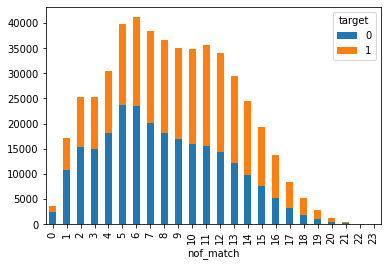

In [2]:
# Basic tool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Data split
from sklearn.model_selection import train_test_split 

os.chdir('/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation')

dcode = pd.read_csv('Jobcare_data/속성_D_코드.csv', index_col=0)
dcode.rename(columns = {
    '속성 D 코드' : 'd',
    '속성 D 대분류코드' : 'dl',
    '속성 D 중분류코드' : 'dm',
    '속성 D 소분류코드' : 'dn',
    '속성 D 세분류코드' : 'do'
}, inplace=True)



hcode = pd.read_csv('Jobcare_data/속성_H_코드.csv', index_col=0)
hcode.rename(columns = {
    '속성 H 코드' : 'h',
    '속성 H 대분류코드' : 'hl',
    '속성 H 중분류코드' : 'hm'
}, inplace=True)

lcode = pd.read_csv('Jobcare_data/속성_L_코드.csv', index_col=0)
lcode.rename(columns = {
    '속성 L 코드' : 'ld',
    '속성 L 대분류코드' : 'll',
    '속성 L 중분류코드' : 'lm',
    '속성 L 소분류코드' : 'ln',
    '속성 L 세분류코드' : 'lo'
}, inplace=True)
dcode = dcode.T.to_dict()
hcode = hcode.T.to_dict()
lcode = lcode.T.to_dict()

tra = pd.read_csv('Jobcare_data/train.csv')


# 칼럼 이름 바꾸기
def df_rename(tra):
  tra.rename(columns = {
      'd_l_match_yn' : 'dlmatch',
      'd_m_match_yn' : 'dmmatch',
      'd_s_match_yn' : 'dsmatch',
      'h_l_match_yn' : 'hlmatch',
      'h_m_match_yn' : 'hmmatch',
      'h_s_match_yn' : 'hsmatch',
      'person_attribute_a' : 'pa',
      'person_attribute_a_1' : 'pa1',
      'person_attribute_b' : 'pb',
      'person_prefer_c' : 'pc',
      'person_prefer_d_1' : 'pd1',
      'person_prefer_d_2' : 'pd2',
      'person_prefer_d_3' : 'pd3',
      'person_prefer_e' : 'pe',
      'person_prefer_f' : 'pf',
      'person_prefer_g' : 'pg',
      'person_prefer_h_1' : 'ph1',
      'person_prefer_h_2' : 'ph2',
      'person_prefer_h_3' : 'ph3',
      
      'contents_attribute_i' : 'ci',
      'contents_attribute_a' : 'ca',
      'contents_attribute_j_1' : 'cj1',
      'contents_attribute_j' : 'cj',
      'contents_attribute_c' : 'cc',
      'contents_attribute_k' : 'ck',
      'contents_attribute_l' : 'cl',
      'contents_attribute_d' : 'cd',
      'contents_attribute_m' : 'cm',
      'contents_attribute_e' : 'ce',
      'contents_attribute_h' : 'ch'
      # 'person_rn' : 'dlmatch',
      # 'contents_rn' : 'dlmatch',
      # 'contents_open_dt' : 'dlmatch',
      }, inplace = True)
  return tra

def convert_time(tra):
  tra['contents_open_dt'] = tra['contents_open_dt'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
  return tra


tra = df_rename(tra)
tra = convert_time(tra)

tes = pd.read_csv('Jobcare_data/test.csv')
print(f'original data columns : {tra.columns}')

tes = df_rename(tes)
tes = convert_time(tes)

# 필요없는 칼럼 드랍.
tra = tra.drop(['id', 'dlmatch',	'dmmatch',	'dsmatch',	'hlmatch',	'hmmatch',	'hsmatch'], axis=1)
tes = tes.drop(['id', 'dlmatch',	'dmmatch',	'dsmatch',	'hlmatch',	'hmmatch',	'hsmatch'], axis=1)


# code 데이터 통합 #############################################
def code_combine(tra):
  

  # pd 
  tra['pd1l'] = tra['pd1'].apply(lambda x: dcode[x]['dl'])
  tra['pd1m'] = tra['pd1'].apply(lambda x: dcode[x]['dm'])
  tra['pd1n'] = tra['pd1'].apply(lambda x: dcode[x]['dn'])
  tra['pd1o'] = tra['pd1'].apply(lambda x: dcode[x]['do'])

  tra['pd2l'] = tra['pd2'].apply(lambda x: dcode[x]['dl'])
  tra['pd2m'] = tra['pd2'].apply(lambda x: dcode[x]['dm'])
  tra['pd2n'] = tra['pd2'].apply(lambda x: dcode[x]['dn'])
  tra['pd2o'] = tra['pd2'].apply(lambda x: dcode[x]['do'])

  tra['pd3l'] = tra['pd3'].apply(lambda x: dcode[x]['dl'])
  tra['pd3m'] = tra['pd3'].apply(lambda x: dcode[x]['dm'])
  tra['pd3n'] = tra['pd3'].apply(lambda x: dcode[x]['dn'])
  tra['pd3o'] = tra['pd3'].apply(lambda x: dcode[x]['do'])

  # ph
  tra['ph1l'] = tra['ph1'].apply(lambda x: hcode[x]['hl'])
  tra['ph1m'] = tra['ph1'].apply(lambda x: hcode[x]['hm'])

  tra['ph2l'] = tra['ph2'].apply(lambda x: hcode[x]['hl'])
  tra['ph2m'] = tra['ph2'].apply(lambda x: hcode[x]['hm'])

  tra['ph3l'] = tra['ph3'].apply(lambda x: hcode[x]['hl'])
  tra['ph3m'] = tra['ph3'].apply(lambda x: hcode[x]['hm'])

  # cd
  tra['cdl'] = tra['cd'].apply(lambda x: dcode[x]['dl'])
  tra['cdm'] = tra['cd'].apply(lambda x: dcode[x]['dm'])
  tra['cdn'] = tra['cd'].apply(lambda x: dcode[x]['dn'])
  tra['cdo'] = tra['cd'].apply(lambda x: dcode[x]['do'])

  # ch
  tra['chl'] = tra['ch'].apply(lambda x: hcode[x]['hl'])
  tra['chm'] = tra['ch'].apply(lambda x: hcode[x]['hm'])

  # cl
  tra['cll'] = tra['cl'].apply(lambda x: lcode[x]['ll'])
  tra['clm'] = tra['cl'].apply(lambda x: lcode[x]['lm'])
  tra['cln'] = tra['cl'].apply(lambda x: lcode[x]['ln'])
  tra['clo'] = tra['cl'].apply(lambda x: lcode[x]['lo'])

  # 매치 ##################################################

  # a
  tra['a_match'] = (tra['pa'] == tra['ca']).astype(int)

  # c
  tra['c_match'] = (tra['pc'] == tra['cc']).astype(int)

  # d
  tra['d1_match'] = (tra['pd1'] == tra['cd']).astype(int)
  tra['d1l_match'] = (tra['pd1l'] == tra['cdl']).astype(int)
  tra['d1m_match'] = (tra['pd1m'] == tra['cdm']).astype(int)
  tra['d1n_match'] = (tra['pd1n'] == tra['cdn']).astype(int)
  tra['d1o_match'] = (tra['pd1o'] == tra['cdo']).astype(int)

  tra['d2_match'] = (tra['pd2'] == tra['cd']).astype(int)
  tra['d2l_match'] = (tra['pd2l'] == tra['cdl']).astype(int)
  tra['d2m_match'] = (tra['pd2m'] == tra['cdm']).astype(int)
  tra['d2n_match'] = (tra['pd2n'] == tra['cdn']).astype(int)
  tra['d2o_match'] = (tra['pd2o'] == tra['cdo']).astype(int)

  tra['d3_match'] = (tra['pd3'] == tra['cd']).astype(int)
  tra['d3l_match'] = (tra['pd3l'] == tra['cdl']).astype(int)
  tra['d3m_match'] = (tra['pd3m'] == tra['cdm']).astype(int)
  tra['d3n_match'] = (tra['pd3n'] == tra['cdn']).astype(int)
  tra['d3o_match'] = (tra['pd3o'] == tra['cdo']).astype(int)

  # e
  tra['e_match'] = (tra['pe'] == tra['ce']).astype(int)

  # h
  tra['h1_match'] = (tra['ph1'] == tra['ch']).astype(int)
  tra['h1l_match'] = (tra['ph1l'] == tra['chl']).astype(int)
  tra['h1m_match'] = (tra['ph1m'] == tra['chm']).astype(int)

  tra['h2_match'] = (tra['ph2'] == tra['ch']).astype(int)
  tra['h2l_match'] = (tra['ph2l'] == tra['chl']).astype(int)
  tra['h2m_match'] = (tra['ph2m'] == tra['chm']).astype(int)

  tra['h3_match'] = (tra['ph3'] == tra['ch']).astype(int)
  tra['h3l_match'] = (tra['ph3l'] == tra['chl']).astype(int)
  tra['h3m_match'] = (tra['ph3m'] == tra['chm']).astype(int)
  
  return tra

tra = code_combine(tra)
tes = code_combine(tes)
print(tra.dtypes)

# 카테고리컬로 바꾸기
cat_cols = [
            'pa', 'pc', 
            'pd1', 'pd1l', 'pd1m', 'pd1n', 'pd1o', 
            'pd2', 'pd2l', 'pd2m', 'pd2n', 'pd2o', 
            'pd3', 'pd3l', 'pd3m', 'pd3n', 'pd3o', 
            'pf', 'pg',
            'ph1', 'ph1l', 'ph1m',
            'ph2', 'ph2l', 'ph2m',
            'ph3', 'ph3l', 'ph3m',

            'ca', 'cc', 
            'cd', 'cdl', 'cdm', 'cdn', 'cdo',
            'ch', 'chl', 'chm',
            'ci', 'cj', 'cj1', 'ck',
            'cll', 'clm', 'cln', 'clo',
            'cm'
            ]

# for ccol in cat_cols:
#   tra[ccol] = tra[ccol].astype('category')
#   tes[ccol] = tes[ccol].astype('category')


# nof_match
cols = [
               'a_match',	'c_match',
               'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
               'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
               'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
               'e_match',
               'h1_match',	'h1l_match',	'h1m_match',
               'h2_match',	'h2l_match',	'h2m_match',
               'h3_match',	'h3l_match',	'h3m_match'
        ]
def f(df):
  nof_match = sum([df[col] for col in cols])
  return nof_match

tra['nof_match'] = tra.apply(f, axis=1)
tes['nof_match'] = tes.apply(f, axis=1)

tra_g = tra.groupby(['nof_match', 'target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

tra.head(20)

# 변수 관계 탐구

In [ ]:
tra.iloc[1]['contents_open_dt'].week

25

In [ ]:
tes['hour'] = tes['contents_open_dt'].apply(lambda x: x.hour)

In [ ]:
tes['weekday'] = tes['contents_open_dt'].apply(lambda x: x.weekday())

In [ ]:
tes['week'] = tes['contents_open_dt'].apply(lambda x: x.week)

In [ ]:
d_dict = {}
newdldmdn = []

for d in tes['pd1']:

  dldmdn = (dcode[d]['dl'], dcode[d]['dm'], dcode[d]['do'])
  if dldmdn in d_dict:
    newdldmdn.append(d_dict[dldmdn])
  else:
    d_dict[dldmdn] = d
    newdldmdn.append(d)

In [ ]:
tes['pd1dldmdn'] = newdldmdn

In [ ]:
tra['hour'] = tra['contents_open_dt'].apply(lambda x: x.hour)

In [ ]:
tra['weekday'] = tra['contents_open_dt'].apply(lambda x: x.weekday())

In [ ]:
tra['week'] = tra['contents_open_dt'].apply(lambda x: x.week)

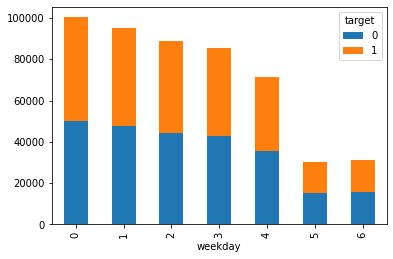

In [ ]:
tra_g = tra.groupby(['weekday', 'target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

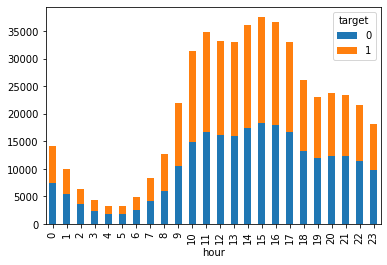

In [ ]:
tra_g = tra.groupby(['hour', 'target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

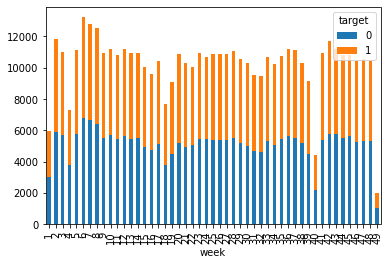

In [ ]:
tra_g = tra.groupby(['week', 'target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

In [ ]:
# dl, dm, dn 수준까지 같으면, 동일한 코드를 부여하는것도 좋을 것 같다.
# dl, dm, do 세 개만 맞으면 True인 변수 생성


d_dict = {}
newdldmdn = []

for d in tra['pd1']:

  dldmdn = (dcode[d]['dl'], dcode[d]['dm'], dcode[d]['do'])
  if dldmdn in d_dict:
    newdldmdn.append(d_dict[dldmdn])
  else:
    d_dict[dldmdn] = d
    newdldmdn.append(d)

In [ ]:
tra['pd1dldmdn'] = newdldmdn

In [ ]:
tra.head(20)

,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,target,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,...,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match,weekday,hour,pd1dldmdn
0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,216,274,274,275,216,297,368,369,216,297,368,369,...,274,274,275,94,422,2016,1605,1606,1607,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,8,4,12,275
1,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,1,56,109,114,1,56,152,175,1,56,152,175,...,274,274,275,94,417,2016,1605,1606,1607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,6,3,17,114
2,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,377,450,463,464,1,56,152,175,377,450,451,452,...,56,91,92,48,363,2016,1572,1595,1599,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,2,20,464
3,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,618,690,703,703,618,690,703,703,618,690,703,703,...,274,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,18,703
4,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,216,274,274,275,216,297,368,369,216,297,368,369,...,274,274,275,71,381,2016,1605,1606,1607,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,9,0,20,275
5,1,1,2,5,175,181,114,4,1,1,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,836994,580234,2020-06-29 20:46:41,1,1,56,152,175,1,56,152,175,1,56,109,114,...,274,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,20,175
6,2,0,3,5,672,180,740,3,1,1,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,380340,204014,2020-04-06 10:28:44,0,618,659,660,672,1,56,152,175,618,716,735,740,...,482,490,490,48,363,2020,1810,1811,1812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,10,672
7,1,2,2,1,372,299,147,5,1,1,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,763441,348156,2020-08-04 20:36:27,1,216,297,368,369,216,297,298,299,1,56,123,145,...,274,274,275,94,417,2016,1605,1606,1607,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,7,1,20,372
8,1,1,2,5,1027,1229,929,5,1,1,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,595150,375553,2020-10-13 16:46:10,0,926,1000,1026,1027,926,1227,1227,1227,926,927,928,929,...,1000,1026,1027,94,422,2006,527,528,529,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,8,1,16,1027
9,1,5,2,1,851,698,1228,5,1,1,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,665636,366182,2020-06-23 05:33:44,0,744,824,847,847,618,690,691,697,926,1227,1227,1227,...,1227,1227,1227,94,422,2006,693,694,721,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,11,1,5,851


In [ ]:
len(tra['pd1dldmdn'].unique())

443

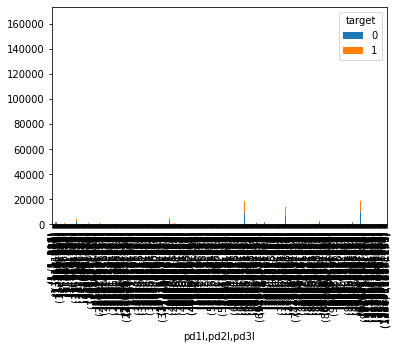

In [ ]:
tra_g = tra.groupby(['pd1l', 'pd2l','pd3l','target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

### 두 변수 관계들을 보자

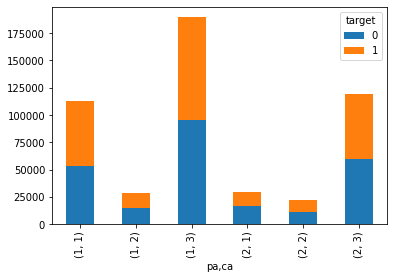

In [ ]:
cols = ['ca']
for col in cols:
  tra_g = tra.groupby(['pa', col, 'target']).count().iloc[:, 0]
  tra_g.unstack().plot(kind='bar', stacked=True)

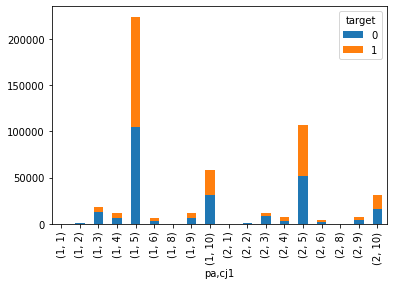

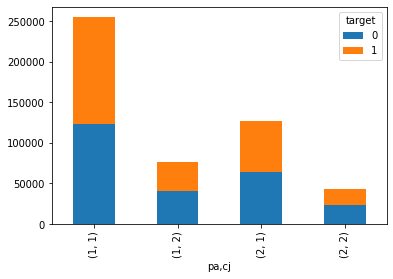

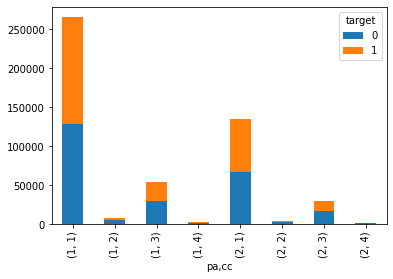

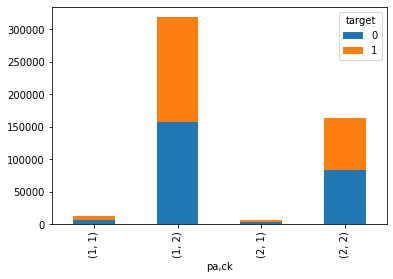

In [ ]:
cols = ['cj1', 'cj', 'cc', 'ck']
for col in cols:
  tra_g = tra.groupby(['pa', col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

## 어떤 사람이 많이 사용할까

In [ ]:
person_cols

['pa',
 'pa1',
 'pb',
 'pc',
 'pd1l',
 'pd1m',
 'pd1n',
 'pd1o',
 'pd2l',
 'pd2m',
 'pd2n',
 'pd2o',
 'pd3l',
 'pd3m',
 'pd3n',
 'pd3o',
 'pe',
 'pf',
 'pg',
 'ph1l',
 'ph1m',
 'ph2l',
 'ph2m',
 'ph3l',
 'ph3m']

In [ ]:
tra.groupby([col, 'target']).count().iloc[:, 0]

pa  target
1   0         163899
    1         167361
2   0          87207
    1          83484
Name: pa1, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


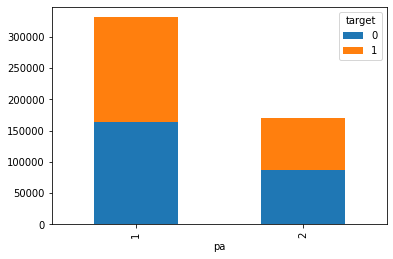

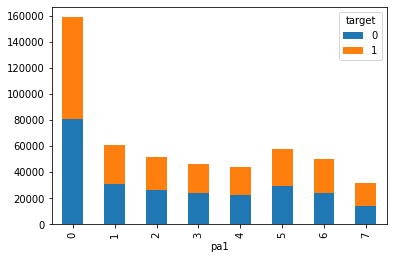

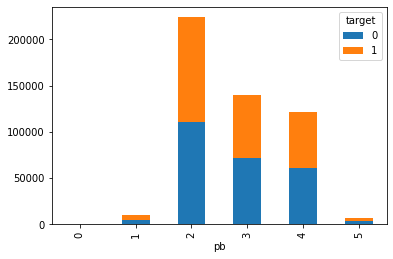

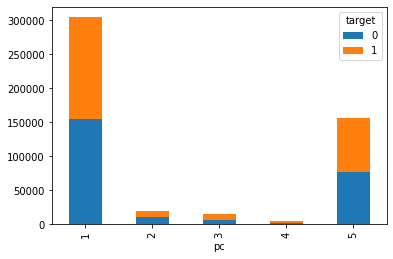

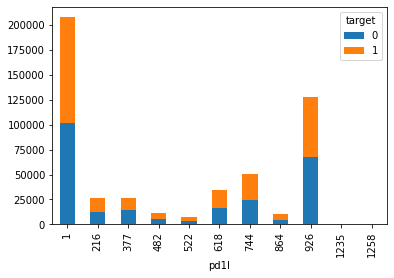

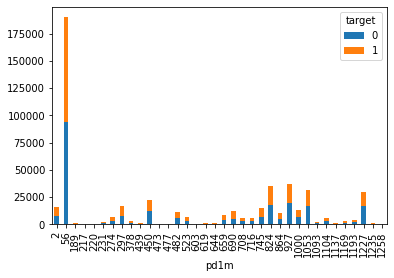

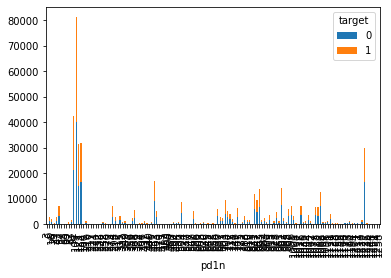

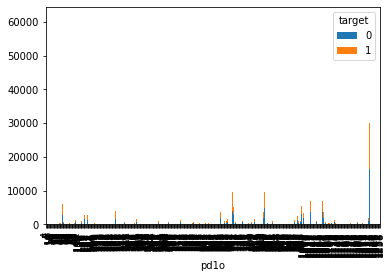

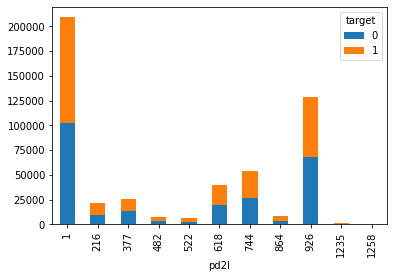

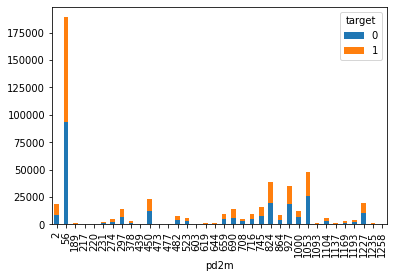

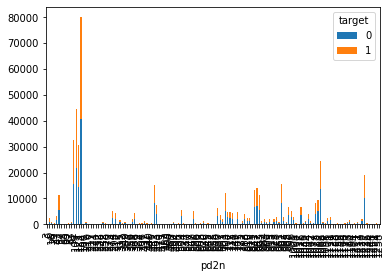

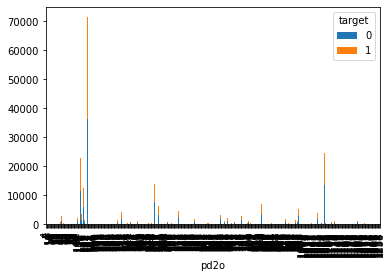

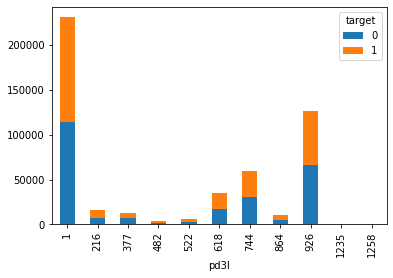

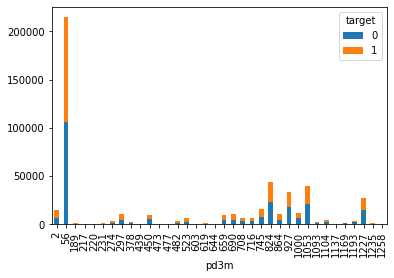

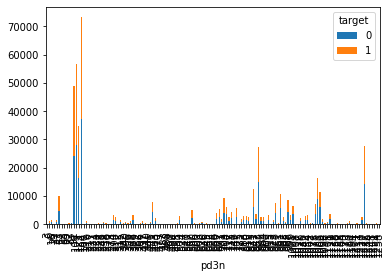

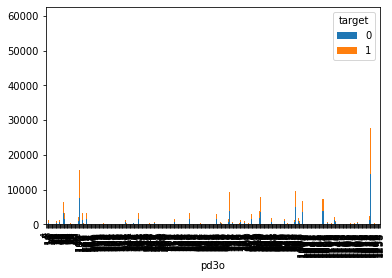

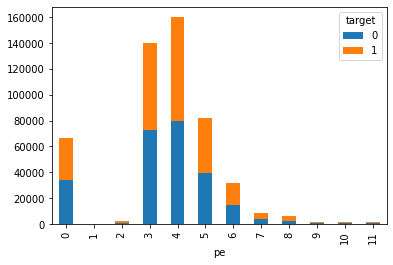

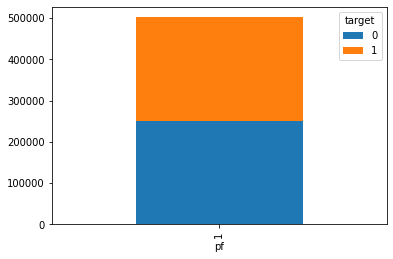

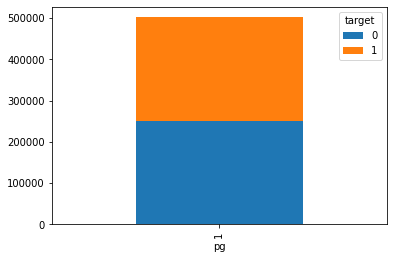

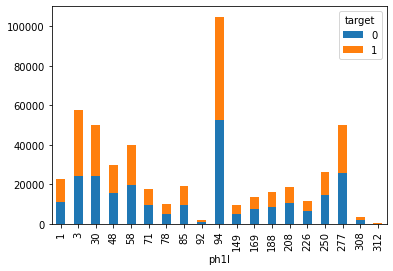

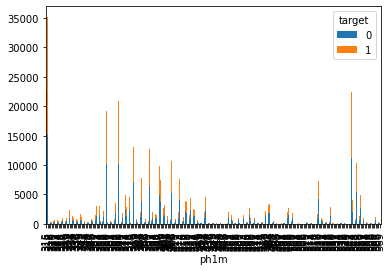

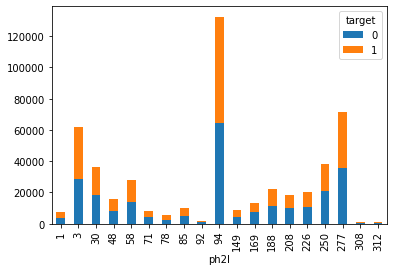

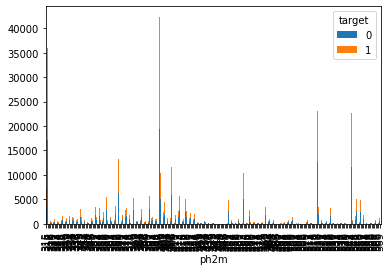

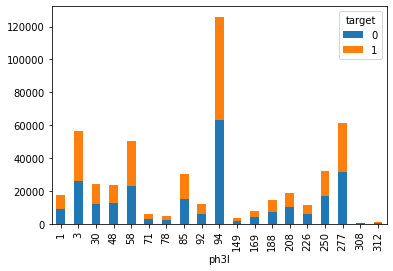

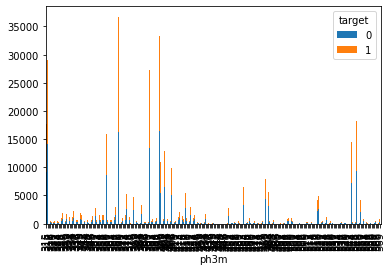

In [ ]:
for col in person_cols:
  tra_g = tra.groupby([col, 'target']).count().iloc[:, 0]
  tra_g.unstack().plot(kind='bar', stacked=True)

## 칼럼의 타입, 유니크 개수 보기

In [ ]:
tra.columns

Index(['pa', 'pa1', 'pb', 'pc', 'pd1', 'pd2', 'pd3', 'pe', 'pf', 'pg', 'ph1',
       'ph2', 'ph3', 'ci', 'ca', 'cj1', 'cj', 'cc', 'ck', 'cl', 'cd', 'cm',
       'ce', 'ch', 'person_rn', 'contents_rn', 'contents_open_dt', 'target',
       'pd1l', 'pd1m', 'pd1n', 'pd1o', 'pd2l', 'pd2m', 'pd2n', 'pd2o', 'pd3l',
       'pd3m', 'pd3n', 'pd3o', 'ph1l', 'ph1m', 'ph2l', 'ph2m', 'ph3l', 'ph3m',
       'cdl', 'cdm', 'cdn', 'cdo', 'chl', 'chm', 'cll', 'clm', 'cln', 'clo',
       'a_match', 'c_match', 'd1_match', 'd1l_match', 'd1m_match', 'd1n_match',
       'd1o_match', 'd2_match', 'd2l_match', 'd2m_match', 'd2n_match',
       'd2o_match', 'd3_match', 'd3l_match', 'd3m_match', 'd3n_match',
       'd3o_match', 'e_match', 'h1_match', 'h1l_match', 'h1m_match',
       'h2_match', 'h2l_match', 'h2m_match', 'h3_match', 'h3l_match',
       'h3m_match', 'nof_match'],
      dtype='object')

In [ ]:
tra['pa'].dtype

dtype('int64')

In [ ]:
for col in tra.columns:
  col_type = tra[col].dtype
  nof_uni = len(tra[col].unique())
  print(f'col : {col:>10}, dtype : {col_type}, unique : {nof_uni}')

col :         pa, dtype : int64, unique : 2
col :        pa1, dtype : int64, unique : 8
col :         pb, dtype : int64, unique : 6
col :         pc, dtype : int64, unique : 5
col :        pd1, dtype : int64, unique : 1093
col :        pd2, dtype : int64, unique : 1081
col :        pd3, dtype : int64, unique : 1043
col :         pe, dtype : int64, unique : 12
col :         pf, dtype : int64, unique : 1
col :         pg, dtype : int64, unique : 1
col :        ph1, dtype : int64, unique : 279
col :        ph2, dtype : int64, unique : 279
col :        ph3, dtype : int64, unique : 279
col :         ci, dtype : int64, unique : 3
col :         ca, dtype : int64, unique : 3
col :        cj1, dtype : int64, unique : 9
col :         cj, dtype : int64, unique : 2
col :         cc, dtype : int64, unique : 4
col :         ck, dtype : int64, unique : 2
col :         cl, dtype : int64, unique : 1752
col :         cd, dtype : int64, unique : 1065
col :         cm, dtype : int64, unique : 5
col :     

## D 뜯어보기

In [ ]:
dcode = pd.read_csv('Jobcare_data/속성_D_코드.csv', index_col=0)
dcode.rename(columns = {
    '속성 D 코드' : 'd',
    '속성 D 대분류코드' : 'dl',
    '속성 D 중분류코드' : 'dm',
    '속성 D 소분류코드' : 'dn',
    '속성 D 세분류코드' : 'do'
}, inplace=True)

not_do = dcode.drop(['do'], axis=1)

dldmdn_d = {}
newdata = []
for idx in not_do.index:
  data = tuple(not_do.loc[idx, :])

  if data not in dldmdn_d:
    dldmdn_d[data] = idx
    newdata.append(idx)
  else:
    newdata.append(dldmdn_d[data])

dcode['dldmdn'] = newdata

,do,dn,dm,dl,dldmdn
속성 D 코드,,,,,
4,4,3,2,1,4
5,5,3,2,1,4
7,7,6,2,1,7
8,8,6,2,1,7
9,8,6,2,1,7
...,...,...,...,...,...
1254,1254,1254,1235,1235,1254
1255,1254,1254,1235,1235,1254
1256,1254,1254,1235,1235,1254


## 어떤 컨텐츠가 인기가 많을까

In [ ]:
cols = ['ca', 'cc', 'cd', 'cdl', 'cdm', 'cdn', 'cdo', 'ce', 'ch', 'chl', 'chm', 'ci', 'cj', 'cj1', 'ck', 'cl', 'cll', 'clm', 'cln', 'clo', 'cm']

In [ ]:
for col in cols:
  tra_g = tra.groupby([col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

KeyError: ignored

어떤게 매치가 잘될수록 1이 높을까

In [ ]:
cols = [
        'a_match',	'c_match',
        'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
        'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
        'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
        'e_match',
        'h1_match',	'h1l_match',	'h1m_match',
        'h2_match',	'h2l_match',	'h2m_match',
        'h3_match',	'h3l_match',	'h3m_match'
        ]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


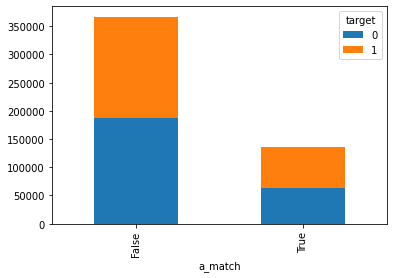

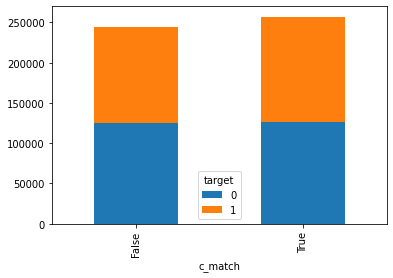

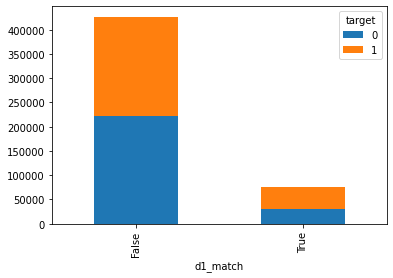

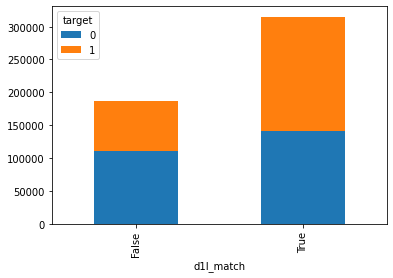

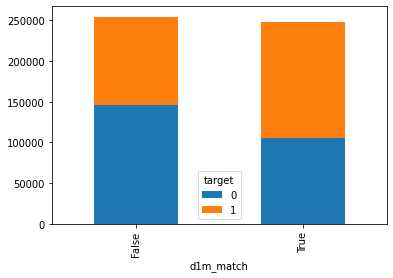

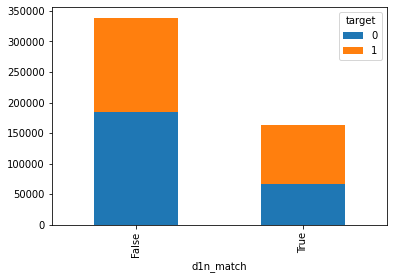

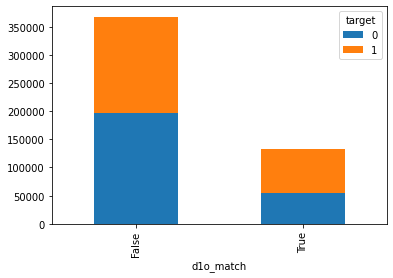

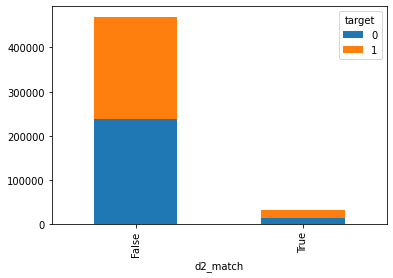

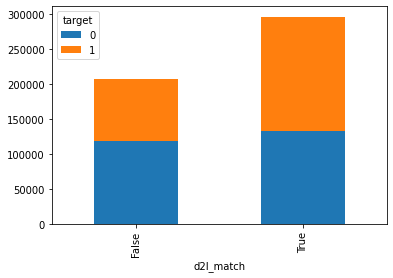

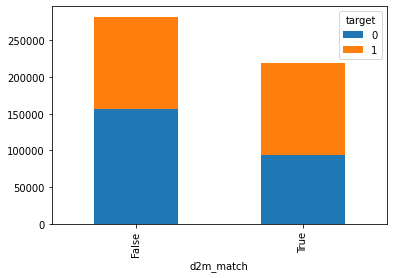

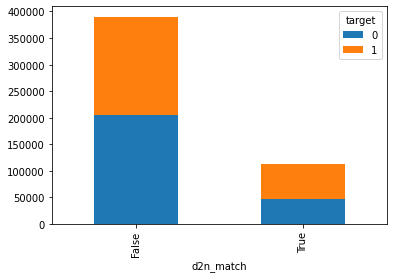

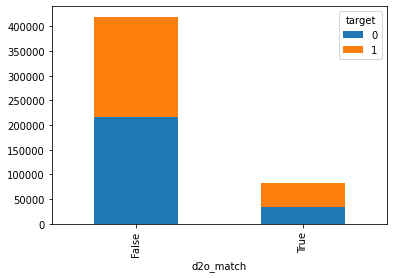

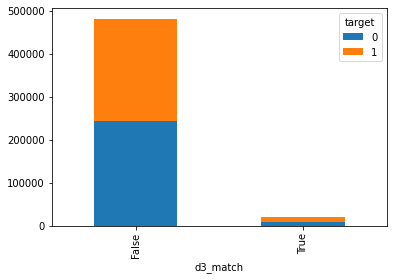

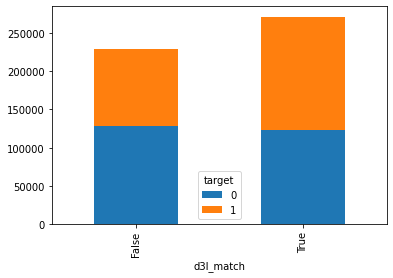

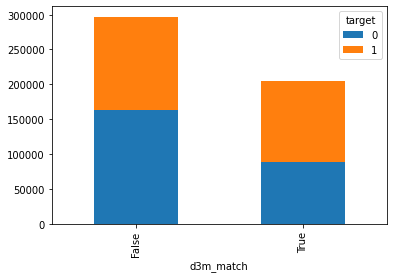

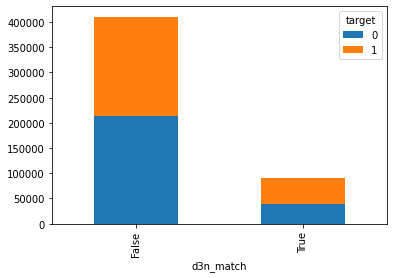

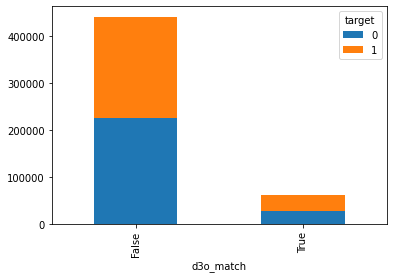

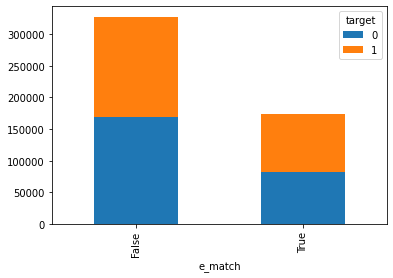

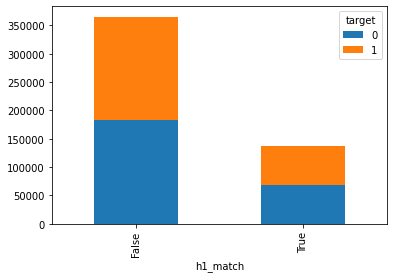

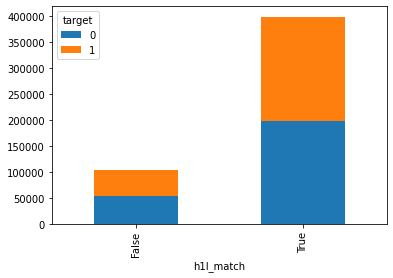

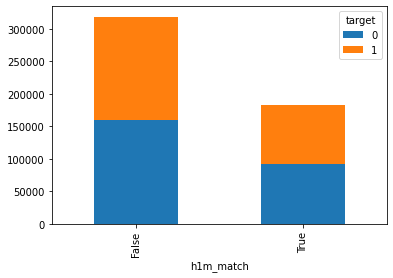

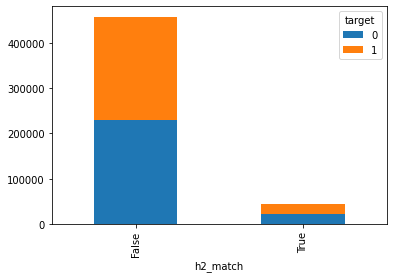

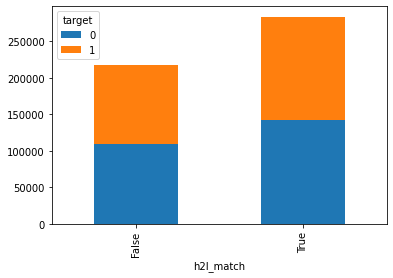

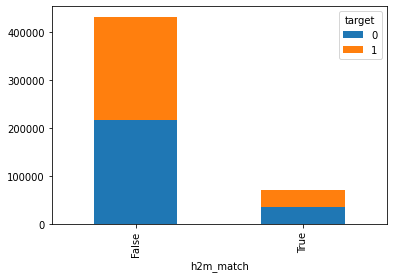

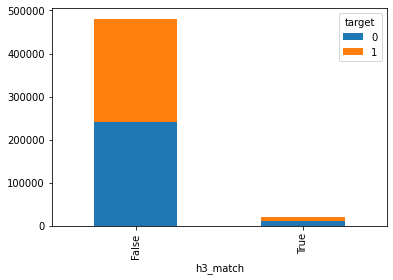

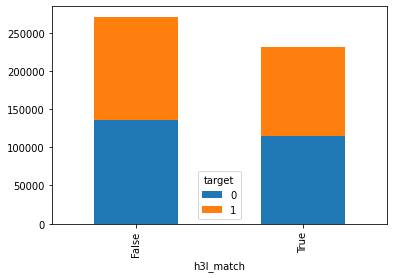

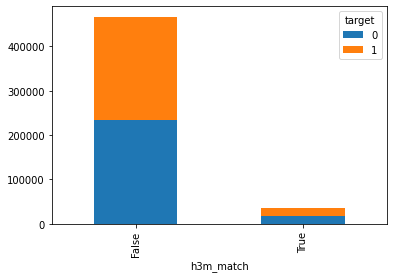

In [ ]:
for col in cols:
  tra_g = tra.groupby([col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

그룹바이해보자

In [ ]:
tra.groupby(['d1_match', 'd2_match', 'target']).count()

id  dlmatch  ...  h3l_match  h3m_match
d1_match d2_match target                   ...                      
False    False    0       208272   208272  ...     208272     208272
                  1       186623   186623  ...     186623     186623
         True     0        13034    13034  ...      13034      13034
                  1        18765    18765  ...      18765      18765
True     False    0        29800    29800  ...      29800      29800
                  1        45457    45457  ...      45457      45457

[6 rows x 87 columns]

a, c, d1, d2, d3, e, h1, h2, h3 중에서 많이 매치돼야 사용할거아닌가?

그럼 몇개가 맞는지를 만들어보자

# 모델돌리기

In [ ]:
tra

,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,target,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,...,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,216,274,274,275,216,297,368,369,216,297,368,369,...,58,368,216,274,274,275,94,422,2016,1605,1606,1607,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,8
1,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,1,56,109,114,1,56,152,175,1,56,152,175,...,94,399,216,274,274,275,94,417,2016,1605,1606,1607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,6
2,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,377,450,463,464,1,56,152,175,377,450,451,452,...,48,366,1,56,91,92,48,363,2016,1572,1595,1599,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4
3,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,618,690,703,703,618,690,703,703,618,690,703,703,...,1,315,216,274,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2
4,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,216,274,274,275,216,297,368,369,216,297,368,369,...,208,480,216,274,274,275,71,381,2016,1605,1606,1607,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1,926,1169,1180,1192,926,927,928,929,926,1227,1227,1227,...,94,398,1,56,123,145,58,373,2006,346,347,352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
501947,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1,1,56,109,114,1,56,109,110,1,56,109,110,...,94,398,1,56,109,114,94,425,2006,99,138,155,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,17
501948,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1,1,56,123,145,1,2,43,46,1,56,123,145,...,94,422,1,56,123,145,58,373,2006,407,417,437,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,13
501949,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1,1,2,43,46,1,56,123,145,1,56,123,145,...,250,523,1,56,123,145,250,524,2006,651,652,659,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,14


In [ ]:
from sklearn.metrics import f1_score

# 학습 칼럼 뽑기

# def select(tra):

#   # tra_x = tra[[
#   #              'a_match',	'c_match',
#   #              'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
#   #              'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
#   #              'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
#   #              'e_match',
#   #              'h1_match',	'h1l_match',	'h1m_match',
#   #              'h2_match',	'h2l_match',	'h2m_match',
#   #              'h3_match',	'h3l_match',	'h3m_match',  'nof_match'
#   #               ]]

#   # tra_x = tra[[
#   #             'd1_match', 'd1o_match', 'd1_match', 'nof_match'
#   #               ]]

#   tra_x = tra.drop(['person_rn', 'contents_rn', 'contents_open_dt', 'target'], axis=1)
#   return tra_x

# tra_x = select(tra)
# tes_x = select(tes)

drop_cols = ['contents_rn', 'contents_open_dt', 'pf', 'pg', 
             'target']




tra_x = tra.drop(drop_cols, axis=1)
tes_x = tes.drop(drop_cols[:-1], axis=1)

print(tra_x.dtypes)

tra_y = tra['target']


X_train, X_val, y_train, y_val = train_test_split(tra_x, tra_y, test_size=0.1, random_state=42)

tra_x

pa           int64
pa1          int64
pb           int64
pc           int64
pd1          int64
             ...  
nof_match    int64
weekday      int64
hour         int64
pd1dldmdn    int64
week         int64
Length: 83, dtype: object


,pa,pa1,pb,pc,pd1,pd2,pd3,pe,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,ph1l,ph1m,ph2l,ph2m,ph3l,...,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match,weekday,hour,pd1dldmdn,week
0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,216,274,274,275,216,297,368,369,216,297,368,369,3,316,94,398,58,...,274,275,94,422,2016,1605,1606,1607,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,8,4,12,275,3
1,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,1,56,109,114,1,56,152,175,1,56,152,175,94,417,94,400,94,...,274,275,94,417,2016,1605,1606,1607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,6,3,17,114,25
2,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,377,450,463,464,1,56,152,175,377,450,451,452,48,364,250,528,48,...,91,92,48,363,2016,1572,1595,1599,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,2,20,464,28
3,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,618,690,703,703,618,690,703,703,618,690,703,703,71,379,226,495,1,...,274,275,71,381,2016,1605,1606,1607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,18,703,3
4,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,216,274,274,275,216,297,368,369,216,297,368,369,208,483,208,481,208,...,274,275,71,381,2016,1605,1606,1607,1,0,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,9,0,20,275,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,926,1169,1180,1192,926,927,928,929,926,1227,1227,1227,58,368,3,316,94,...,123,145,58,373,2006,346,347,352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,12,1192,11
501947,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,1,56,109,114,1,56,109,110,1,56,109,110,94,401,94,425,94,...,109,114,94,425,2006,99,138,155,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,17,0,11,114,4
501948,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,1,56,123,145,1,2,43,46,1,56,123,145,58,368,94,413,94,...,123,145,58,373,2006,407,417,437,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,13,2,17,147,32
501949,1,1,2,1,46,147,145,4,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,1,2,43,46,1,56,123,145,1,56,123,145,250,518,48,359,250,...,123,145,250,524,2006,651,652,659,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,14,0,9,46,25


## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, oob_score=True, criterion='gini', random_state=42, )
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.6228357054868852

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, oob_score=True, criterion='gini', random_state=42, )
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.6136501074174825

## LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.03, n_estimators=10)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.5925930988428277

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.5998811660150961

## XGBoost

In [ ]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(max_dept=10)
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_val)
f1_score(y_val, y_pred, average='macro')

ValueError: ignored

## Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.5920172783029582

## Feature Importance

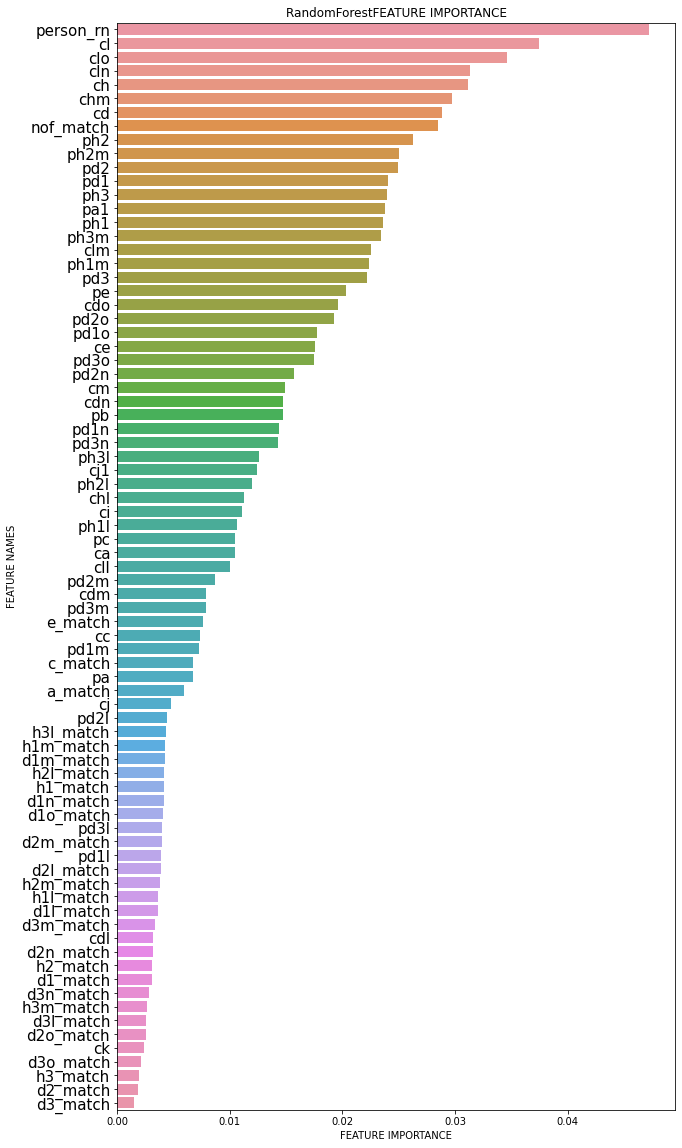

In [ ]:
plot_feature_importance(rfc.feature_importances_,tra_x.columns,'RandomForest')

In [ ]:
model

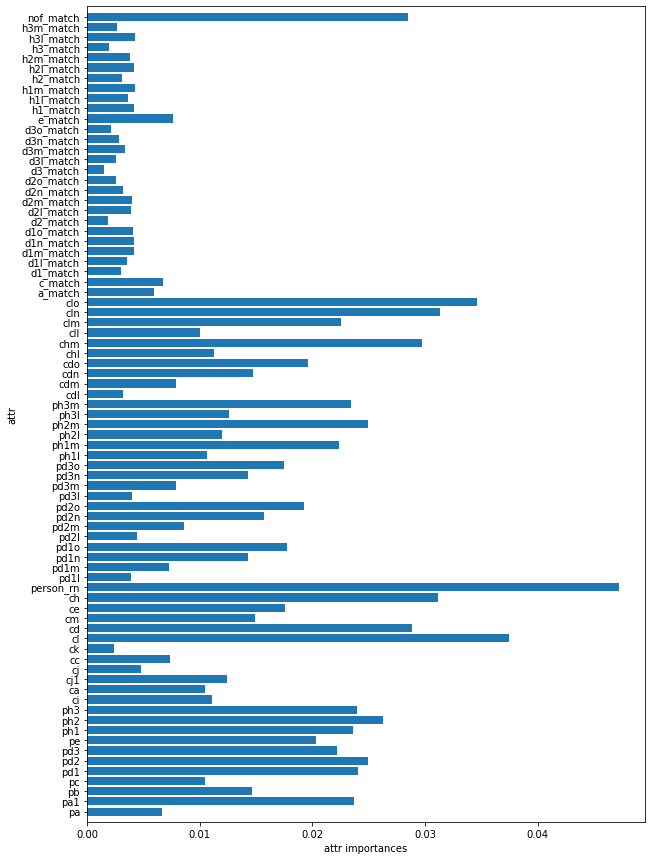

In [ ]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):

    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

## Catboost **

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 68.4 MB/s 


In [ ]:
from catboost import Pool,CatBoostClassifier
from sklearn.model_selection import StratifiedKFold , KFold

SEED = 42
is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

cat_features = tra_x.columns[tra_x.nunique() > 2].tolist()

cat_cols = []
for col in tra_x.columns:
  if str(tra[col].dtype )== 'category' or tra[col].dtype == bool:
    cat_cols.append(col)


In [ ]:
cat_features = tra_x.columns[tra_x.nunique() > 2].tolist()

print(f'cat_features 변수 개수 : {len(cat_features)}, 나머지 int 변수 개수 : {len(tra_x.columns) - len(cat_features)}')

for col in tra_x.columns:
  col_type = tra_x[col].dtype
  nof_uni = len(tra_x[col].unique())
  print(f'col : {col:>10}, dtype : {col_type}, unique : {nof_uni:>8}', end=' ')
  if col in cat_features:
    print(f'****')
  else:
    print()

cat_features 변수 개수 : 53, 나머지 int 변수 개수 : 30
col :         pa, dtype : int64, unique :        2 
col :        pa1, dtype : int64, unique :        8 ****
col :         pb, dtype : int64, unique :        6 ****
col :         pc, dtype : int64, unique :        5 ****
col :        pd1, dtype : int64, unique :     1093 ****
col :        pd2, dtype : int64, unique :     1081 ****
col :        pd3, dtype : int64, unique :     1043 ****
col :         pe, dtype : int64, unique :       12 ****
col :        ph1, dtype : int64, unique :      279 ****
col :        ph2, dtype : int64, unique :      279 ****
col :        ph3, dtype : int64, unique :      279 ****
col :         ci, dtype : int64, unique :        3 ****
col :         ca, dtype : int64, unique :        3 ****
col :        cj1, dtype : int64, unique :        9 ****
col :         cj, dtype : int64, unique :        2 
col :         cc, dtype : int64, unique :        4 ****
col :         ck, dtype : int64, unique :        2 
col :         cl

In [ ]:
scores = []
models = []

for tri, vai in cv.split(tra_x):
    print("="*50)
    preds = []

    model = CatBoostClassifier(
                              iterations=iterations,
                               random_state=SEED,
                               task_type="GPU",
                               eval_metric="F1",
                               cat_features=cat_features,
                               one_hot_max_size=4
                               )
    model.fit(tra_x.iloc[tri], tra_y[tri], 
            eval_set=[(tra_x.iloc[vai], tra_y[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break

print(scores)
print(np.mean(scores))

Learning rate set to 0.027144
0:	learn: 0.5580580	test: 0.5657245	best: 0.5657245 (0)	total: 137ms	remaining: 6m 50s
100:	learn: 0.6421843	test: 0.6512764	best: 0.6513479 (96)	total: 12s	remaining: 5m 43s
200:	learn: 0.6531805	test: 0.6704163	best: 0.6704163 (200)	total: 24.5s	remaining: 5m 40s
300:	learn: 0.6590233	test: 0.6803602	best: 0.6804406 (293)	total: 36.8s	remaining: 5m 30s
400:	learn: 0.6631816	test: 0.6840190	best: 0.6844487 (389)	total: 49s	remaining: 5m 17s
500:	learn: 0.6662625	test: 0.6859686	best: 0.6861084 (477)	total: 1m 1s	remaining: 5m 4s
bestTest = 0.6861084039
bestIteration = 477
Shrink model to first 478 iterations.
Learning rate set to 0.027144
0:	learn: 0.5967187	test: 0.5961145	best: 0.5961145 (0)	total: 144ms	remaining: 7m 12s
100:	learn: 0.6434613	test: 0.6542572	best: 0.6542572 (100)	total: 12.2s	remaining: 5m 49s
200:	learn: 0.6532158	test: 0.6703539	best: 0.6703539 (200)	total: 25.1s	remaining: 5m 49s
300:	learn: 0.6595590	test: 0.6799574	best: 0.6799574

In [ ]:
threshold_l = np.arange(0.3, 0.51, 0.01)

for th in threshold_l:
  pred_list = []
  scores = []
  for i,(tri, vai) in enumerate( cv.split(tra_x) ):
      pred = models[i].predict_proba(tra_x.iloc[vai])[:, 1]
      pred = np.where(pred >= th , 1, 0)
      score = f1_score(tra_y[vai],pred)
      scores.append(score)
      pred = models[i].predict_proba(tes_x)[:, 1]
      pred_list.append(pred)
  print(f'threshold : {th:.2f}')
  print(scores)
  print(f'{np.mean(scores):.8f}')
  print(f'')


threshold : 0.30
[0.7035462653370306, 0.7010325782438166, 0.6653726759683327, 0.7044468826167316, 0.7000058626956674]
0.69488085

threshold : 0.31
[0.7051356710575781, 0.7022304315001723, 0.6653726759683327, 0.7056658106844395, 0.7014381846519772]
0.69596855

threshold : 0.32
[0.7067749630301183, 0.7033986570835519, 0.6653726759683327, 0.7064642368100088, 0.7028416456809072]
0.69697044

threshold : 0.33
[0.7080335731414867, 0.704746868437123, 0.6653726759683327, 0.7075197560589023, 0.7040896829988504]
0.69795251

threshold : 0.34
[0.709195202503042, 0.7062102748268246, 0.6653726759683327, 0.7085672499028787, 0.7049264817341215]
0.69885438

threshold : 0.35
[0.7095962484273133, 0.7077597186002789, 0.6653726759683327, 0.7091117452064699, 0.705755428711341]
0.69951916

threshold : 0.36
[0.7101991198104206, 0.7086700955180014, 0.6653726759683327, 0.7099309562826676, 0.7070412089185556]
0.70024281

threshold : 0.37
[0.7109245004276495, 0.7093187774951484, 0.6653726759683327, 0.7095204076025

KeyboardInterrupt: ignored

In [ ]:
threshold = 0.38

In [ ]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(tra_x) ):
    pred = models[i].predict_proba(tra_x.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(tra_y[vai],pred)
    scores.append(score)

    # test에 모델 5개의 확률값을 저장
    pred = models[i].predict_proba(tes_x)[:, 1]
    pred_list.append(pred)
print(f'threshold : {threshold:.2f}')
print(scores)
print(f'{np.mean(scores):.4f}')

threshold : 0.38
[0.7111837864184526, 0.7137949217813714, 0.7078430912065632, 0.7093121768529737, 0.7100559725225798]
0.7104


In [ ]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [ ]:
sample_submission = pd.read_csv('Jobcare_data/sample_submission.csv')
sample_submission['target'] = pred
sample_submission

,id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [ ]:
sample_submission.to_csv('catboost0.38_kc_addonly_nof.csv', index=False)

### Feature Importance

name :            person_rn, importance : 19.1724101618944
name :                   cd, importance : 7.848373001427117
name :                   ch, importance : 6.336105607887486
name :                  cj1, importance : 6.0427962030814
name :                   cl, importance : 5.986525965922935
name :            nof_match, importance : 5.153168176702074
name :            d1m_match, importance : 2.9028337480722515
name :                  cdo, importance : 2.3257497512532166
name :                   ca, importance : 2.2411006239959357
name :                  clo, importance : 2.074809933234306
name :                  cdn, importance : 1.8986449091979039
name :            d1n_match, importance : 1.7374605459436794
name :            d1l_match, importance : 1.654208844406225
name :                 pd1o, importance : 1.5961315287461135
name :                  pd1, importance : 1.5427982446253463
name :                  chm, importance : 1.4937404225928241
name :                 pd2o, import

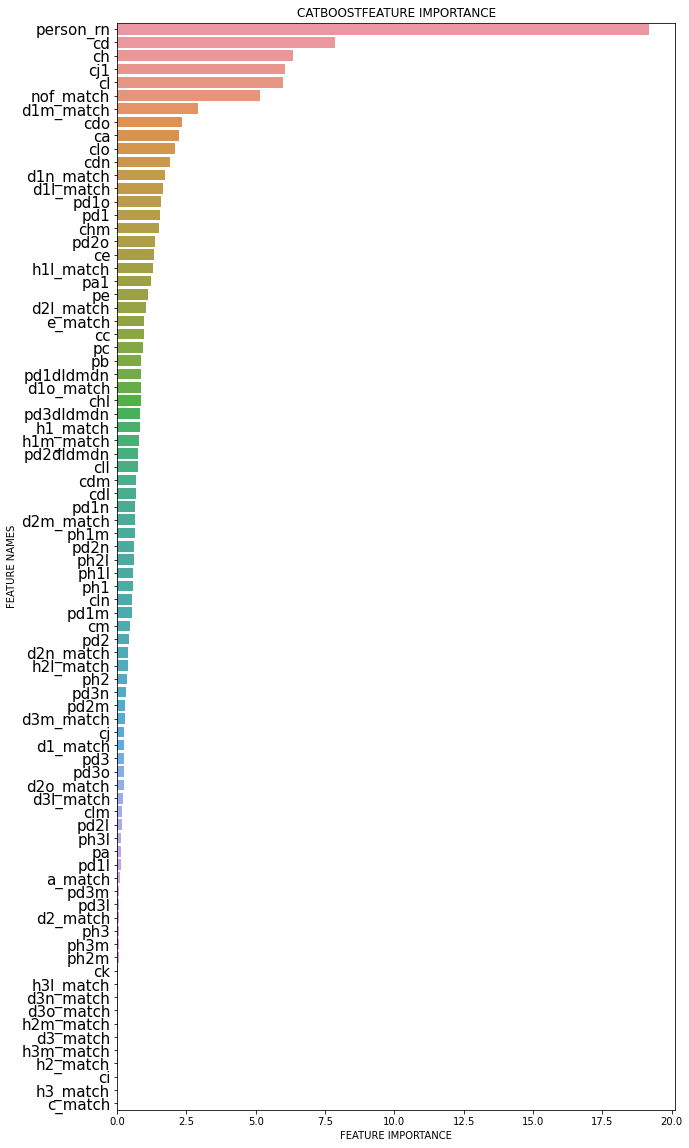

In [ ]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):
    

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.yticks(fontsize=15)
    plt.ylabel('FEATURE NAMES')

    for n, i in zip(fi_df['feature_names'], fi_df['feature_importance']):
      print(f'name : {n:>20}, importance : {i:>10}')

    for n in fi_df['feature_names']:
      print(f'\'{n}\', ', end='')

plot_feature_importance(model.get_feature_importance(),tra_x.columns,'CATBOOST')

#제출파일생성

In [ ]:
submission = pd.read_csv('Jobcare_data/sample_submission.csv')
submission['target'] = lgbm.predict(tes_x)
submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,0
46401,46401,1
46402,46402,1


In [ ]:
submission.to_csv('lgbm.csv', index=False)

# catboost 공유된 코드

In [ ]:
DATA_PATH = "/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation/Jobcare_data/"
SUBMIT_PATH = "/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation/"

SEED = 42

import os
import sys
import platform
import random
import math
from typing import List ,Dict, Tuple

import pandas as pd
import numpy as np
 
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 

from catboost import Pool,CatBoostClassifier

print(f"- os: {platform.platform()}")
print(f"- python: {sys.version}")
print(f"- pandas: {pd.__version__}")
print(f"- numpy: {np.__version__}")
print(f"- sklearn: {sklearn.__version__}")



train_data = pd.read_csv(f'{DATA_PATH}train.csv')
test_data = pd.read_csv(f'{DATA_PATH}test.csv')

code_d = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv')
code_h = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv')
code_l = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv')

print(train_data.shape , test_data.shape)

code_d.columns= ["attribute_d","attribute_d_d","attribute_d_s","attribute_d_m","attribute_d_l"]
code_h.columns= ["attribute_h","attribute_h_p", "attribute_h_l"]
code_l.columns= ["attribute_l","attribute_l_d","attribute_l_s","attribute_l_m","attribute_l_l"]



def merge_codes(df:pd.DataFrame,df_code:pd.DataFrame,col:str)->pd.DataFrame:
    df = df.copy()
    df_code = df_code.copy()
    df_code = df_code.add_prefix(f"{col}_")
    df_code.columns.values[0] = col
    return pd.merge(df,df_code,how="left",on=col)

def preprocess_data(
                    df:pd.DataFrame,is_train:bool = True,
                    cols_merge:List[Tuple[str,pd.DataFrame]] = [],
                    cols_equi:List[Tuple[str,str]]= [],
                    cols_drop:List[str] = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt"]
                    )->Tuple[pd.DataFrame,np.ndarray]:
    df = df.copy()

    y_data = None
    if is_train:
        y_data = df["target"].to_numpy()
        df = df.drop(columns="target")

    for col, df_code in cols_merge:
        df = merge_codes(df,df_code,col)

    cols = df.select_dtypes(bool).columns.tolist()
    df[cols] = df[cols].astype(int)

    for col1, col2 in cols_equi:
        df[f"{col1}_{col2}"] = (df[col1] == df[col2] ).astype(int)

    df = df.drop(columns=cols_drop)
    return (df , y_data)


# 소분류 중분류 대분류 속성코드 merge 컬럼명 및 데이터 프레임 리스트
cols_merge = [
              ("person_prefer_d_1" , code_d),
              ("person_prefer_d_2" , code_d),
              ("person_prefer_d_3" , code_d),
              ("contents_attribute_d" , code_d),
              ("person_prefer_h_1" , code_h),
              ("person_prefer_h_2" , code_h),
              ("person_prefer_h_3" , code_h),
              ("contents_attribute_h" , code_h),
              ("contents_attribute_l" , code_l),
]

# 회원 속성과 콘텐츠 속성의 동일한 코드 여부에 대한 컬럼명 리스트
cols_equi = [

    ("contents_attribute_c","person_prefer_c"),
    ("contents_attribute_e","person_prefer_e"),

    ("person_prefer_d_2_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_2_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_2_attribute_d_l" , "contents_attribute_d_attribute_d_l"),
    ("person_prefer_d_3_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_3_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_3_attribute_d_l" , "contents_attribute_d_attribute_d_l"),

    ("person_prefer_h_1_attribute_h_p" , "contents_attribute_h_attribute_h_p"),
    ("person_prefer_h_2_attribute_h_p" , "contents_attribute_h_attribute_h_p"),
    ("person_prefer_h_3_attribute_h_p" , "contents_attribute_h_attribute_h_p"),

]

# 학습에 필요없는 컬럼 리스트
cols_drop = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt", "contents_rn" ]



x_train, y_train = preprocess_data(train_data, cols_merge = cols_merge , cols_equi= cols_equi , cols_drop = cols_drop)
x_test, _ = preprocess_data(test_data,is_train = False, cols_merge = cols_merge , cols_equi= cols_equi  , cols_drop = cols_drop)
print(x_train.shape , y_train.shape , x_test.shape)


cat_features = x_train.columns[x_train.nunique() > 2].tolist()

is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)


# 칼럼 확인 ###################################################################
for col in x_train.columns:
  col_type = x_train[col].dtype
  nof_uni = len(x_train[col].unique())
  print(f'col : {col:<80}, dtype : {col_type}, unique : {nof_uni}', end='')
  if col in cat_features:
    print(f'****')
  else:
    print()

#######################################################################


scores = []
models = []
for tri, vai in cv.split(x_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations,random_state=SEED,task_type="GPU",eval_metric="F1",cat_features=cat_features,one_hot_max_size=4)
    model.fit(x_train.iloc[tri], y_train[tri], 
            eval_set=[(x_train.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

- os: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
- python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
- pandas: 1.1.5
- numpy: 1.19.5
- sklearn: 1.0.2
(501951, 35) (46404, 34)
(501951, 68) (501951,) (46404, 68)
col : d_l_match_yn                                                                    , dtype : int64, unique : 2
col : d_m_match_yn                                                                    , dtype : int64, unique : 2
col : d_s_match_yn                                                                    , dtype : int64, unique : 2
col : h_l_match_yn                                                                    , dtype : int64, unique : 2
col : h_m_match_yn                                                                    , dtype : int64, unique : 2
col : h_s_match_yn                                                                    , dtype : int64, unique : 2
col : person_attribute_a                                                              , dty

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.027144
0:	learn: 0.5967573	test: 0.6012587	best: 0.6012587 (0)	total: 127ms	remaining: 6m 20s
100:	learn: 0.6439737	test: 0.6529375	best: 0.6529500 (99)	total: 11.5s	remaining: 5m 29s
200:	learn: 0.6541253	test: 0.6714723	best: 0.6714723 (200)	total: 22.8s	remaining: 5m 16s
300:	learn: 0.6599914	test: 0.6804008	best: 0.6804497 (299)	total: 33.7s	remaining: 5m 1s
400:	learn: 0.6635645	test: 0.6836931	best: 0.6838477 (393)	total: 44.6s	remaining: 4m 49s
500:	learn: 0.6662233	test: 0.6846659	best: 0.6849831 (477)	total: 55.2s	remaining: 4m 35s
600:	learn: 0.6687145	test: 0.6856906	best: 0.6859456 (598)	total: 1m 5s	remaining: 4m 21s
bestTest = 0.6861069942
bestIteration = 621
Shrink model to first 622 iterations.
Learning rate set to 0.027144
0:	learn: 0.6097428	test: 0.6111231	best: 0.6111231 (0)	total: 143ms	remaining: 7m 9s
100:	learn: 0.6445468	test: 0.6566854	best: 0.6566854 (100)	total: 11.6s	remaining: 5m 32s
200:	learn: 0.6542871	test: 0.6718652	best: 0.6718

KeyboardInterrupt: ignored

In [ ]:
print(scores)
print(np.mean(scores))

[]
nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
threshold = 0.4

In [ ]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.7133094431307542, 0.7121655484601082, 0.7114550129368731, 0.708894573241808, 0.7089549802487676]
0.7109559116036621


In [ ]:
x_train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,person_prefer_d_1_attribute_d_d,person_prefer_d_1_attribute_d_s,person_prefer_d_1_attribute_d_m,person_prefer_d_1_attribute_d_l,person_prefer_d_2_attribute_d_d,person_prefer_d_2_attribute_d_s,person_prefer_d_2_attribute_d_m,person_prefer_d_2_attribute_d_l,person_prefer_d_3_attribute_d_d,person_prefer_d_3_attribute_d_s,person_prefer_d_3_attribute_d_m,person_prefer_d_3_attribute_d_l,contents_attribute_d_attribute_d_d,contents_attribute_d_attribute_d_s,contents_attribute_d_attribute_d_m,contents_attribute_d_attribute_d_l,person_prefer_h_1_attribute_h_p,person_prefer_h_1_attribute_h_l,person_prefer_h_2_attribute_h_p,person_prefer_h_2_attribute_h_l,person_prefer_h_3_attribute_h_p,person_prefer_h_3_attribute_h_l,contents_attribute_h_attribute_h_p,contents_attribute_h_attribute_h_l,contents_attribute_l_attribute_l_d,contents_attribute_l_attribute_l_s,contents_attribute_l_attribute_l_m,contents_attribute_l_attribute_l_l,contents_attribute_c_person_prefer_c,contents_attribute_e_person_prefer_e,person_prefer_d_2_attribute_d_s_contents_attribute_d_attribute_d_s,person_prefer_d_2_attribute_d_m_contents_attribute_d_attribute_d_m,person_prefer_d_2_attribute_d_l_contents_attribute_d_attribute_d_l,person_prefer_d_3_attribute_d_s_contents_attribute_d_attribute_d_s,person_prefer_d_3_attribute_d_m_contents_attribute_d_attribute_d_m,person_prefer_d_3_attribute_d_l_contents_attribute_d_attribute_d_l,person_prefer_h_1_attribute_h_p_contents_attribute_h_attribute_h_p,person_prefer_h_2_attribute_h_p_contents_attribute_h_attribute_h_p,person_prefer_h_3_attribute_h_p_contents_attribute_h_attribute_h_p
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016,1,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,0,1,0,0,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,368,58,316,3,398,94,373,58,352,347,346,2006,0,0,0,0,0,0,0,0,0,0,0
501947,1,1,0,1,0,0,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,401,94,425,94,398,94,425,94,155,138,99,2006,1,1,1,1,1,1,1,1,0,1,0
501948,1,1,1,1,0,0,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,145,123,56,1,46,43,2,1,145